In [ ]:
API_KEY='enter your api key'
location="enter your location"
import requests
import csv
from datetime import datetime, timedelta

# Start and end dates
start_date = datetime.strptime("2024-04-01", "%Y-%m-%d")
end_date = datetime.strptime("2025-04-15", "%Y-%m-%d")

with open("1_year_weather.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["DateTime", "Temperature (°C)","Temperature (°F)", "Condition", "Humidity", "Wind (kph)", "Pressure (mb)"])

    current_date = start_date
    while current_date <= end_date:
        date_str = current_date.strftime("%Y-%m-%d")
        print(f"Fetching data for {date_str}...")

        url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={location}&dt={date_str}"

        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                hourly_data = data['forecast']['forecastday'][0]['hour']
                for hour in hourly_data:
                    writer.writerow([
                        date_str,
                        hour['time'],
                        hour['temp_c'],
                        hour['temp_f'],
                        hour['condition']['text'],
                        hour['humidity'],
                        hour['wind_kph'],
                        hour['pressure_mb']
                    ])
            else:
                print(f"❌ Failed for {date_str}: {response.status_code}")
        except Exception as e:
            print(f"⚠️ Error on {date_str}: {e}")

        current_date += timedelta(days=1)

print("✅ One-year data saved to 1_year_weather.csv")

Fetching data for 2024-04-01...
❌ Failed for 2024-04-01: 400
Fetching data for 2024-04-02...
❌ Failed for 2024-04-02: 400
Fetching data for 2024-04-03...
❌ Failed for 2024-04-03: 400
Fetching data for 2024-04-04...
❌ Failed for 2024-04-04: 400
Fetching data for 2024-04-05...
❌ Failed for 2024-04-05: 400
Fetching data for 2024-04-06...
❌ Failed for 2024-04-06: 400
Fetching data for 2024-04-07...
❌ Failed for 2024-04-07: 400
Fetching data for 2024-04-08...
❌ Failed for 2024-04-08: 400
Fetching data for 2024-04-09...
❌ Failed for 2024-04-09: 400
Fetching data for 2024-04-10...
Fetching data for 2024-04-11...
Fetching data for 2024-04-12...
Fetching data for 2024-04-13...
Fetching data for 2024-04-14...
Fetching data for 2024-04-15...
Fetching data for 2024-04-16...
Fetching data for 2024-04-17...
Fetching data for 2024-04-18...
Fetching data for 2024-04-19...
Fetching data for 2024-04-20...
Fetching data for 2024-04-21...
Fetching data for 2024-04-22...
Fetching data for 2024-04-23...
Fet

In [ ]:
import pandas as pd
weather_data=pd.read_csv("1_year_weather.csv")
weather_data.head()

,DateTime,Temperature (°C),Temperature (°F),Condition,Humidity,Wind (kph),Pressure (mb)
2024-04-10,2024-04-10 00:00,25.4,77.8,Clear,83,8.3,1010.0
2024-04-10,2024-04-10 01:00,25.1,77.2,Partly cloudy,84,7.9,1010.0
2024-04-10,2024-04-10 02:00,24.9,76.9,Partly cloudy,85,7.2,1009.0
2024-04-10,2024-04-10 03:00,24.7,76.5,Partly cloudy,86,7.6,1009.0
2024-04-10,2024-04-10 04:00,24.6,76.2,Partly cloudy,87,7.2,1009.0


In [ ]:
weather_data.isna().sum()

,0
DateTime,0
Temperature (°C),0
Temperature (°F),0
Condition,0
Humidity,0
Wind (kph),0
Pressure (mb),0


In [ ]:
df=weather_data.copy()

# **visulaition**

In [ ]:
obj_column=[]
num_column=[]
for column in df.columns:
  if df[column].dtype=="object":
    obj_column.append(column)
  else:
    num_column.append(column)

In [ ]:
print(obj_column)
print(num_column)

['DateTime', 'Condition']
['Temperature (°C)', 'Temperature (°F)', 'Humidity', 'Wind (kph)', 'Pressure (mb)']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

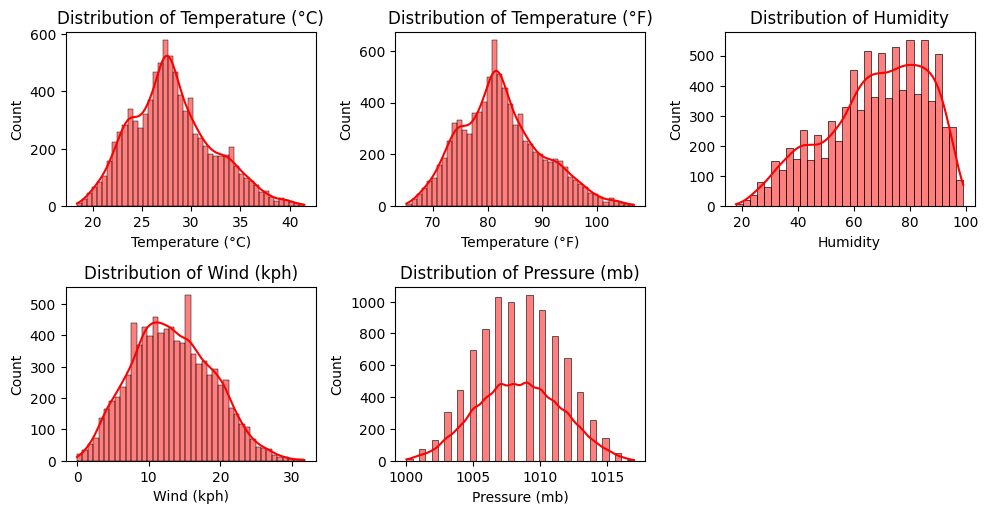

In [ ]:
plot_num = 1
plt.figure(figsize=(10, 15))  # Adjust size for better spacing

for col in num_column:
    plt.subplot(6, 3, plot_num)  # 6 rows, 3 columns
    sns.histplot(data=df, x=col, kde=True, color='red')
    plt.title(f'Distribution of {col}')
    plot_num += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='Condition', ylabel='count'>

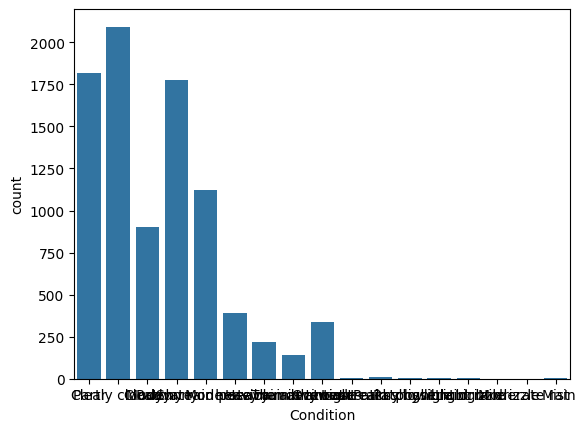

In [ ]:
sns.countplot(data=df,x=obj_column[1])

In [ ]:
df["Condition"].unique()

array(['Clear', 'Partly cloudy', 'Cloudy', 'Sunny',
       'Patchy rain possible', 'Moderate or heavy rain shower',
       'Moderate rain at times', 'Heavy rain at times', 'Overcast',
       'Thundery outbreaks possible', 'Light rain shower',
       'Patchy light rain', 'Patchy light drizzle', 'Light rain',
       'Light drizzle', 'Moderate rain', 'Mist'], dtype=object)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df['year']=df['DateTime'].dt.year
df['month']=df['DateTime'].dt.month
df['day']=df['DateTime'].dt.day
df['hour']=df['DateTime'].dt.hour
df['week day']=df['DateTime'].dt.day_of_week

In [ ]:
def get_season(month):
  if month in [12,1,2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  else:
    return 'Autumn'

df['Season'] = df['month'].apply(get_season)

In [ ]:
df['week day'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int32)

<Axes: xlabel='Season', ylabel='count'>

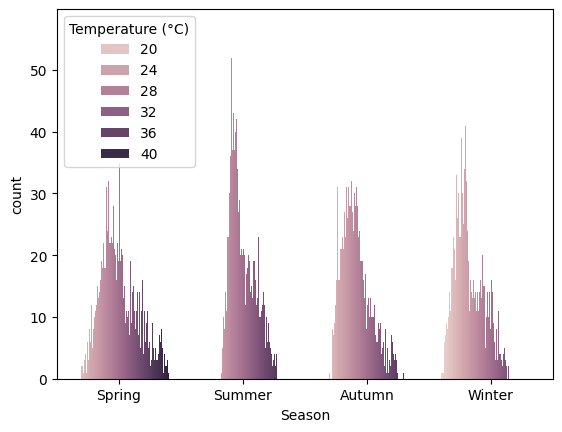

In [ ]:
sns.countplot(data=df,x="Season",hue="Temperature (°C)")

In [ ]:
df['Temperature label']=pd.cut(df["Temperature (°C)"],bins=[17,25,35,45],labels=['chill','normal','burn'])

<Axes: xlabel='month', ylabel='count'>

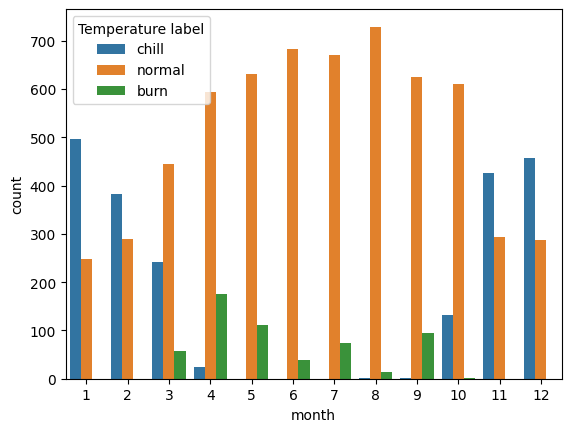

In [ ]:
sns.countplot(data=df,x="month",hue="Temperature label")

In [ ]:
df["Temperature (°C)"].describe()

,Temperature (°C)
count,8832.000000
mean,28.045086
std,4.139722
min,18.400000
25%,25.100000
50%,27.700000
75%,30.500000
max,41.500000


<Axes: xlabel='Temperature label', ylabel='count'>

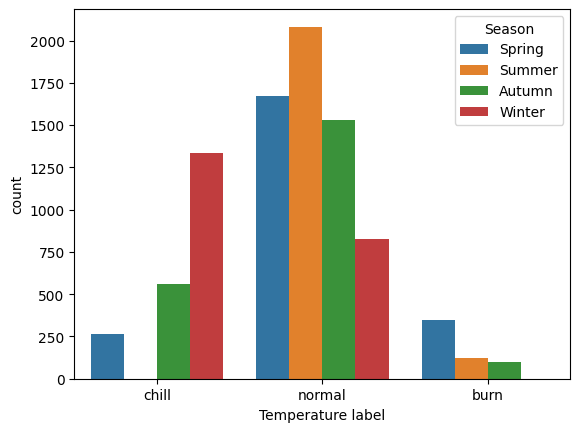

In [ ]:
sns.countplot(data=df,x="Temperature label",hue="Season")

<Axes: xlabel='Season', ylabel='count'>

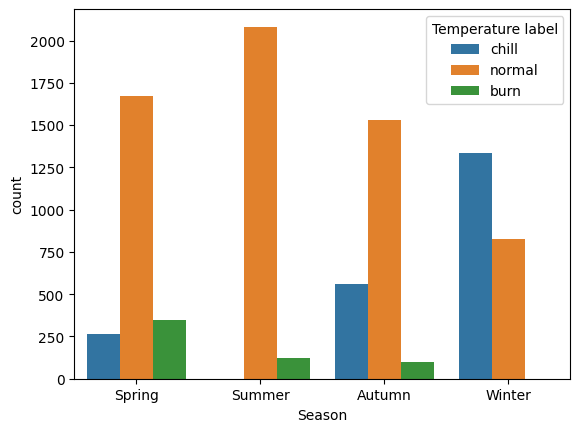

In [ ]:
sns.countplot(data=df,x="Season",hue="Temperature label")

In [ ]:
df['part of day']=pd.cut(df["hour"],bins=[-1,5,10,15,19,23],labels=['mid night','moring','afternoon','evening','night'])

In [ ]:
df['part of day'].isna().sum()

np.int64(0)

<Axes: xlabel='part of day', ylabel='count'>

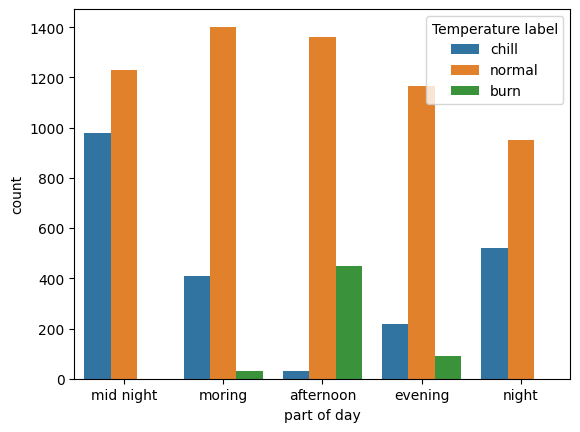

In [ ]:
sns.countplot(data=df,x='part of day',hue='Temperature label')

In [ ]:
df.groupby('month').max()

,DateTime,Temperature (°C),Temperature (°F),Condition,Humidity,Wind (kph),Pressure (mb),year,day,hour,week day,Season,Temperature label,part of day
month,,,,,,,,,,,,,,
1,2025-01-31 23:00:00,30.5,86.8,Sunny,98,27.0,1016.0,2025,31,23,6,Winter,normal,night
2,2025-02-28 23:00:00,34.3,93.7,Sunny,97,29.5,1017.0,2025,28,23,6,Winter,normal,night
3,2025-03-31 23:00:00,38.1,100.7,Sunny,95,25.6,1016.0,2025,31,23,6,Spring,burn,night
4,2025-04-12 23:00:00,40.9,105.7,Thundery outbreaks possible,91,28.8,1013.0,2025,30,23,6,Spring,burn,night
5,2024-05-31 23:00:00,41.5,106.7,Thundery outbreaks possible,93,26.3,1011.0,2024,31,23,6,Spring,burn,night
6,2024-06-30 23:00:00,37.5,99.4,Sunny,91,27.0,1010.0,2024,30,23,6,Summer,burn,night
7,2024-07-31 23:00:00,38.0,100.3,Sunny,86,31.7,1010.0,2024,31,23,6,Summer,burn,night
8,2024-08-31 23:00:00,36.1,96.9,Sunny,92,28.8,1011.0,2024,31,23,6,Summer,burn,night
9,2024-09-30 23:00:00,38.3,100.9,Sunny,91,26.3,1012.0,2024,30,23,6,Autumn,burn,night


In [ ]:
peak_of_month=df.groupby('month')['Temperature (°C)'].max()

In [ ]:
low_of_month=df.groupby('month')['Temperature (°C)'].min()

In [ ]:
average_of_month=df.groupby('month')['Temperature (°C)'].mean()

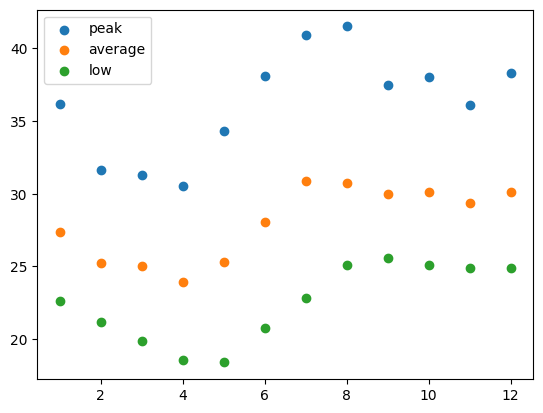

In [ ]:
plt.scatter(x=df['month'].unique(),y=peak_of_month)
plt.scatter(x=df['month'].unique(),y=average_of_month)
plt.scatter(x=df['month'].unique(),y=low_of_month)
plt.legend(['peak','average','low'])

<Axes: xlabel='Season', ylabel='count'>

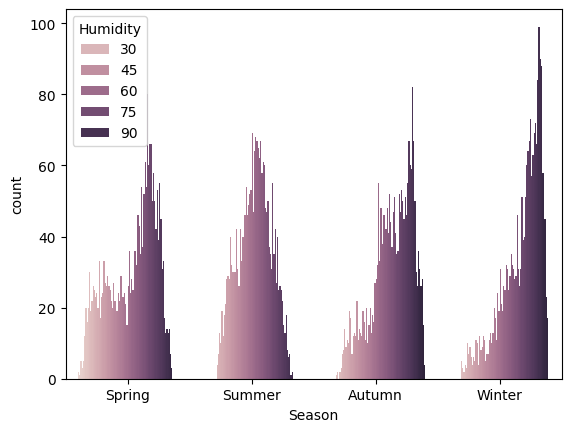

In [ ]:
sns.countplot(data=df,x='Season',hue='Humidity')

In [ ]:
df.groupby('Season')['Humidity'].mean()

,Humidity
Season,
Autumn,72.388736
Spring,62.466667
Summer,60.942482
Winter,77.043519


<Axes: xlabel='part of day', ylabel='count'>

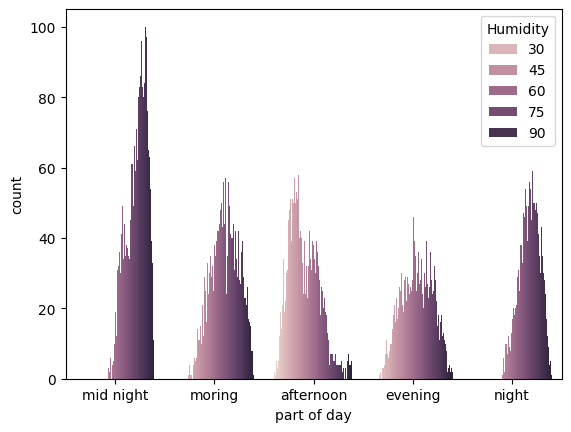

In [ ]:
sns.countplot(data=df,x='part of day',hue='Humidity')

In [ ]:
df.groupby('part of day')['Humidity'].mean()

<ipython-input-32-dc767491b314>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('part of day')['Humidity'].mean()


,Humidity
part of day,
mid night,80.884964
moring,69.547283
afternoon,48.859783
evening,62.772418
night,76.516304


In [ ]:
df.groupby('week day')['Humidity'].mean()

,Humidity
week day,
0,68.693910
1,67.738782
2,67.994497
3,67.637579
4,68.471698
5,68.435535
6,67.754808


In [ ]:
df.groupby(['Season','week day','part of day'])['Humidity'].mean()

<ipython-input-34-abe85a1f6abe>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Season','week day','part of day'])['Humidity'].mean()


Season  week day  part of day
Autumn  0         mid night      82.551282
                  moring         71.800000
                  afternoon      55.738462
                  evening        69.942308
                  night          79.115385
                                   ...    
Winter  6         mid night      88.320513
                  moring         79.030769
                  afternoon      58.707692
                  evening        74.250000
                  night          86.096154
Name: Humidity, Length: 140, dtype: float64

In [ ]:
df.groupby(['Season','week day'])['Humidity'].mean()

Season  week day
Autumn  0           72.051282
        1           71.910256
        2           71.208333
        3           71.256410
        4           73.490385
        5           75.278846
        6           71.525641
Spring  0           63.634615
        1           62.538462
        2           62.151786
        3           62.127976
        4           61.958333
        5           62.372024
        6           62.580128
Summer  0           61.336538
        1           60.663462
        2           62.173077
        3           60.653846
        4           61.503205
        5           60.860119
        6           59.413462
Winter  0           77.753205
        1           75.842949
        2           76.894231
        3           76.935897
        4           77.435897
        5           76.934028
        6           77.500000
Name: Humidity, dtype: float64

In [ ]:
len(df["Condition"].unique())

17

<Axes: xlabel='Season', ylabel='count'>

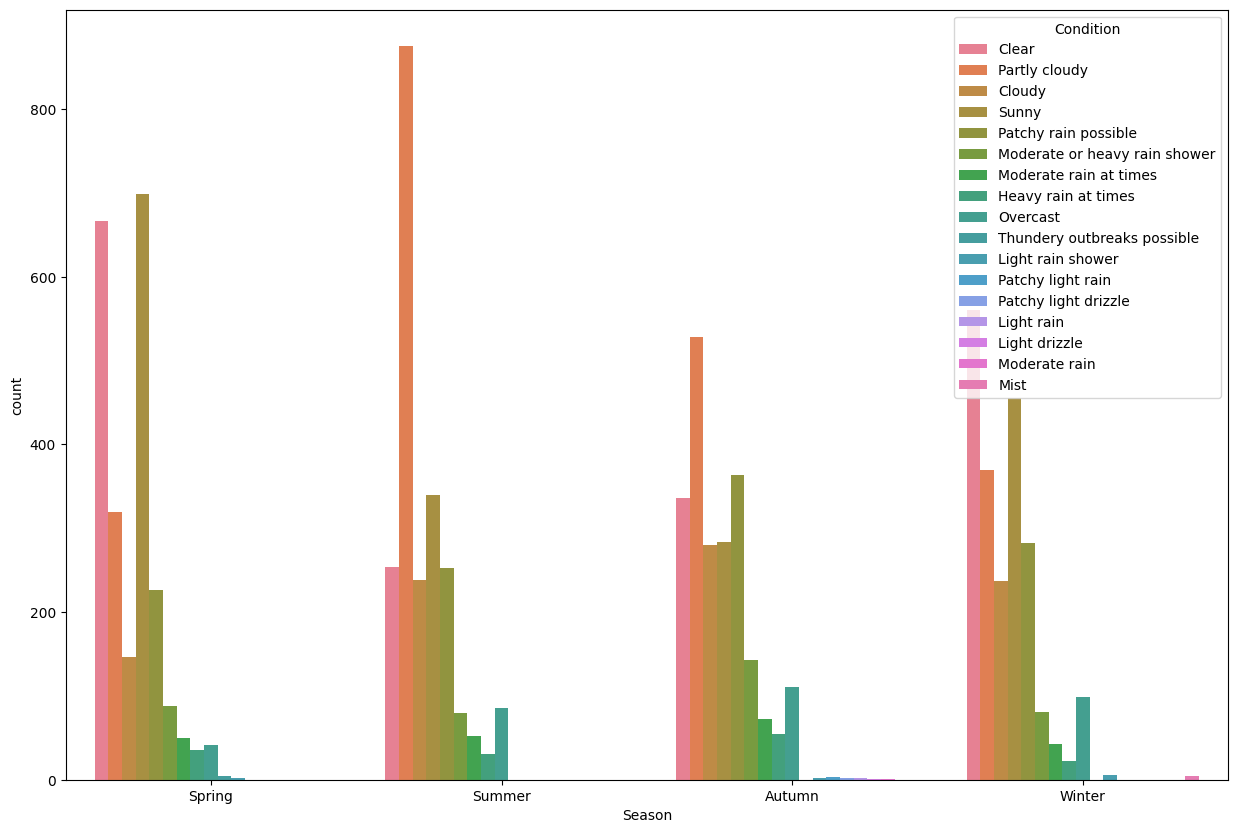

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Season',hue='Condition')

In [ ]:
def simplify_condition(cond):
    cond = cond.lower()
    if 'rain' in cond:
        return 'Rainy'
    elif 'cloud' in cond or 'overcast' in cond:
        return 'Cloudy'
    elif 'sunny' in cond or 'clear' in cond:
        return 'Clear'
    elif 'thunder' in cond:
        return 'Stormy'
    elif 'mist' in cond:
        return 'Mist'
    else:
        return 'Other'

df['Weather_Type'] = df['Condition'].apply(simplify_condition)

In [ ]:
df['Weather_Type'].isna().sum()

np.int64(0)

<Axes: xlabel='Season', ylabel='count'>

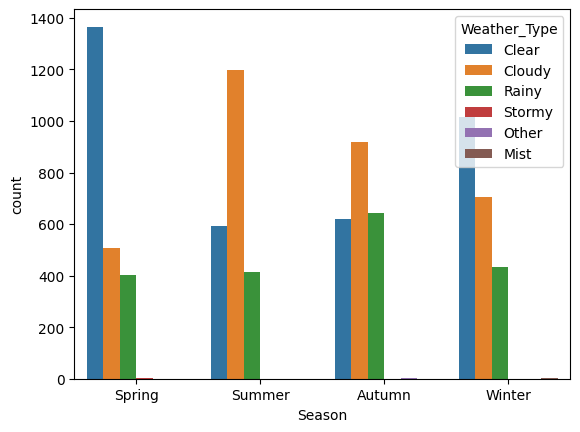

In [ ]:
sns.countplot(data=df,x='Season',hue='Weather_Type')

In [ ]:
df.groupby(['Season','Weather_Type'])['Humidity'].mean()

Season  Weather_Type
Autumn  Clear           66.493548
        Cloudy          73.824810
        Other           86.333333
        Rainy           75.961059
Spring  Clear           59.051977
        Cloudy          69.070727
        Rainy           65.653367
        Stormy          68.750000
Summer  Clear           57.537037
        Cloudy          62.344741
        Rainy           61.766827
Winter  Clear           73.280788
        Cloudy          80.327195
        Mist            95.750000
        Rainy           80.321839
Name: Humidity, dtype: float64

In [ ]:
df.groupby(['Season','Weather_Type'])['Temperature (°C)'].mean()

Season  Weather_Type
Autumn  Clear           28.312097
        Cloudy          27.338411
        Other           24.233333
        Rainy           27.233022
Spring  Clear           30.406296
        Cloudy          29.135167
        Rainy           29.175312
        Stormy          30.325000
Summer  Clear           30.309933
        Cloudy          29.499332
        Rainy           30.045913
Winter  Clear           24.499015
        Cloudy          24.587110
        Mist            23.025000
        Rainy           25.550575
Name: Temperature (°C), dtype: float64

In [ ]:
df['Humidity label']=pd.cut(df['Humidity'],bins=[15,40,60,100],labels=['low','medium','high'])

In [ ]:
df['Wind_Level'] = pd.cut(df['Wind (kph)'], bins=[0, 10, 20, 40, 100], labels=["Calm", "Breezy", "Windy", "Storm"])

In [ ]:
df['Pressure_Level'] = pd.cut(df['Pressure (mb)'], bins=[900, 1000, 1020, 1050], labels=["Low", "Normal", "High"])

In [ ]:
df['Feels_Muggy'] = ((df['Humidity'] > 65) & (df['Temperature (°F)'] > 75)).astype(int)

In [ ]:
df['Feels_Muggy'].unique()

array([1, 0])

In [ ]:
df['is_rain']=df['Weather_Type'].apply(lambda x:1 if x=='Rainy' else 0)

In [ ]:
df['is_rain'].isna().sum()

np.int64(0)

<Axes: xlabel='Season', ylabel='count'>

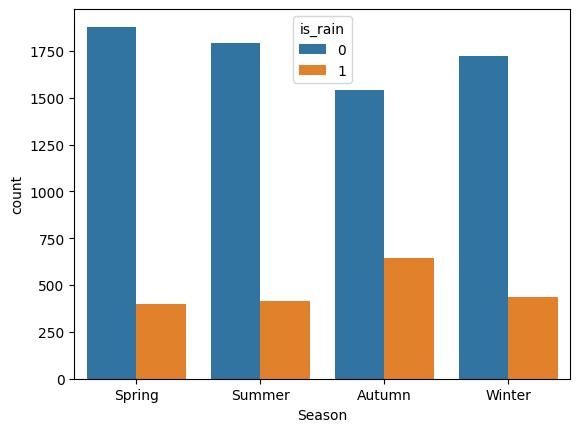

In [ ]:
sns.countplot(data=df,x='Season',hue='is_rain')

In [ ]:
df['Wind_Level']=df['Wind_Level'].fillna('Breezy')


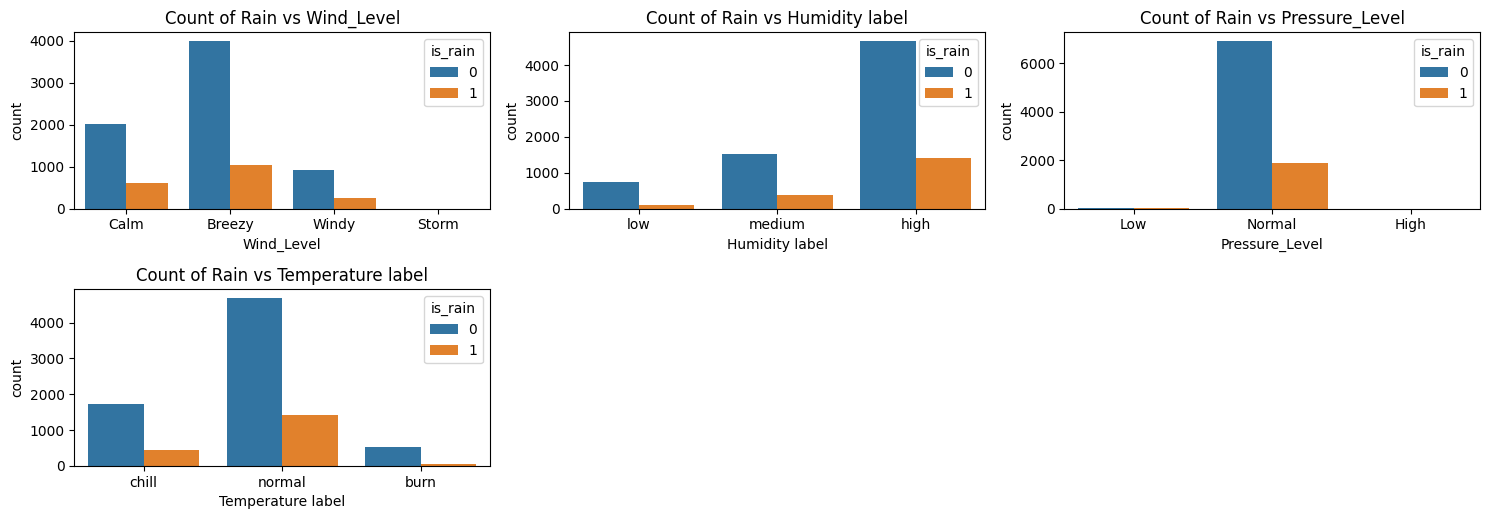

In [ ]:
plt.figure(figsize=(15,10))
temprature_levels = ['Wind_Level','Humidity label','Pressure_Level','Temperature label']
plot_num=1
for col in temprature_levels:
    plt.subplot(4,3,plot_num)
    sns.countplot(data=df,x=col,hue='is_rain')
    plt.title(f'Count of Rain vs {col}')
    plot_num+=1
plt.tight_layout()
plt.show()

# **Model**

In [ ]:
obj_list=[]
number_list=[]
cat_list=[]
dt_list=[]

for column in df.columns:
  if df[column].dtype=='object':
    obj_list.append(column)
  elif df[column].dtype=='category':
    cat_list.append(column)
  elif df[column].dtype=='datetime64[ns]':
    dt_list.append(column)
  else:
    number_list.append(column)


In [ ]:
print(obj_list)
print(number_list)
print(cat_list)
print(dt_list)

['Condition', 'Season', 'Weather_Type']
['Temperature (°C)', 'Temperature (°F)', 'Humidity', 'Wind (kph)', 'Pressure (mb)', 'year', 'month', 'day', 'hour', 'week day', 'Feels_Muggy', 'is_rain']
['Temperature label', 'part of day', 'Humidity label', 'Wind_Level', 'Pressure_Level']
['DateTime']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8832 entries, 2024-04-10 to 2025-04-12
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DateTime           8832 non-null   datetime64[ns]
 1   Temperature (°C)   8832 non-null   float64       
 2   Temperature (°F)   8832 non-null   float64       
 3   Condition          8832 non-null   object        
 4   Humidity           8832 non-null   int64         
 5   Wind (kph)         8832 non-null   float64       
 6   Pressure (mb)      8832 non-null   float64       
 7   year               8832 non-null   int32         
 8   month              8832 non-null   int32         
 9   day                8832 non-null   int32         
 10  hour               8832 non-null   int32         
 11  week day           8832 non-null   int32         
 12  Season             8832 non-null   object        
 13  Temperature label  8832 non-null   category      
 14

<Axes: >

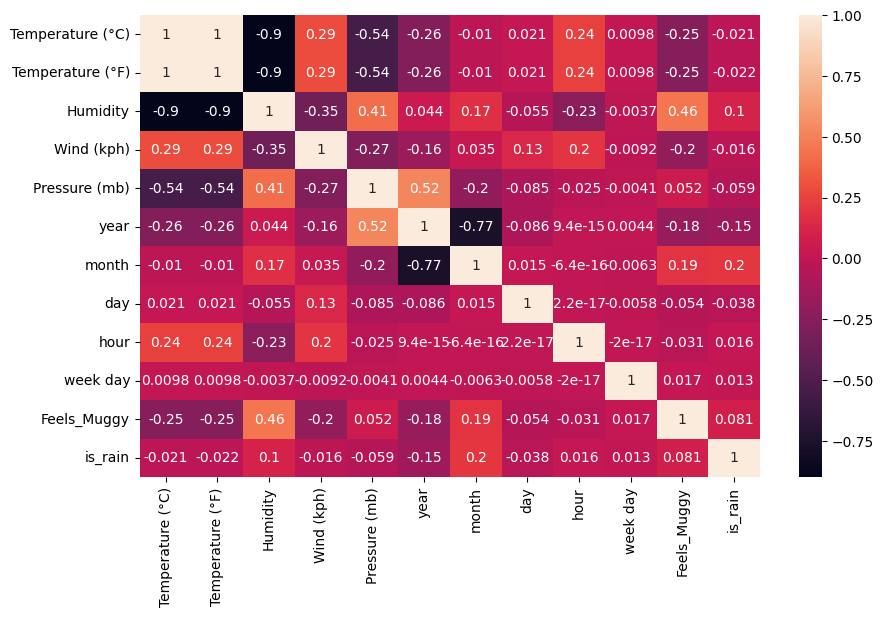

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[number_list].corr(),annot=True)

In [ ]:
X=df.loc[:,['Season', 'Weather_Type','part of day','Humidity','Wind (kph)', 'Pressure (mb)','month', 'hour','Feels_Muggy', 'is_rain']]
y = df['Temperature (°C)']

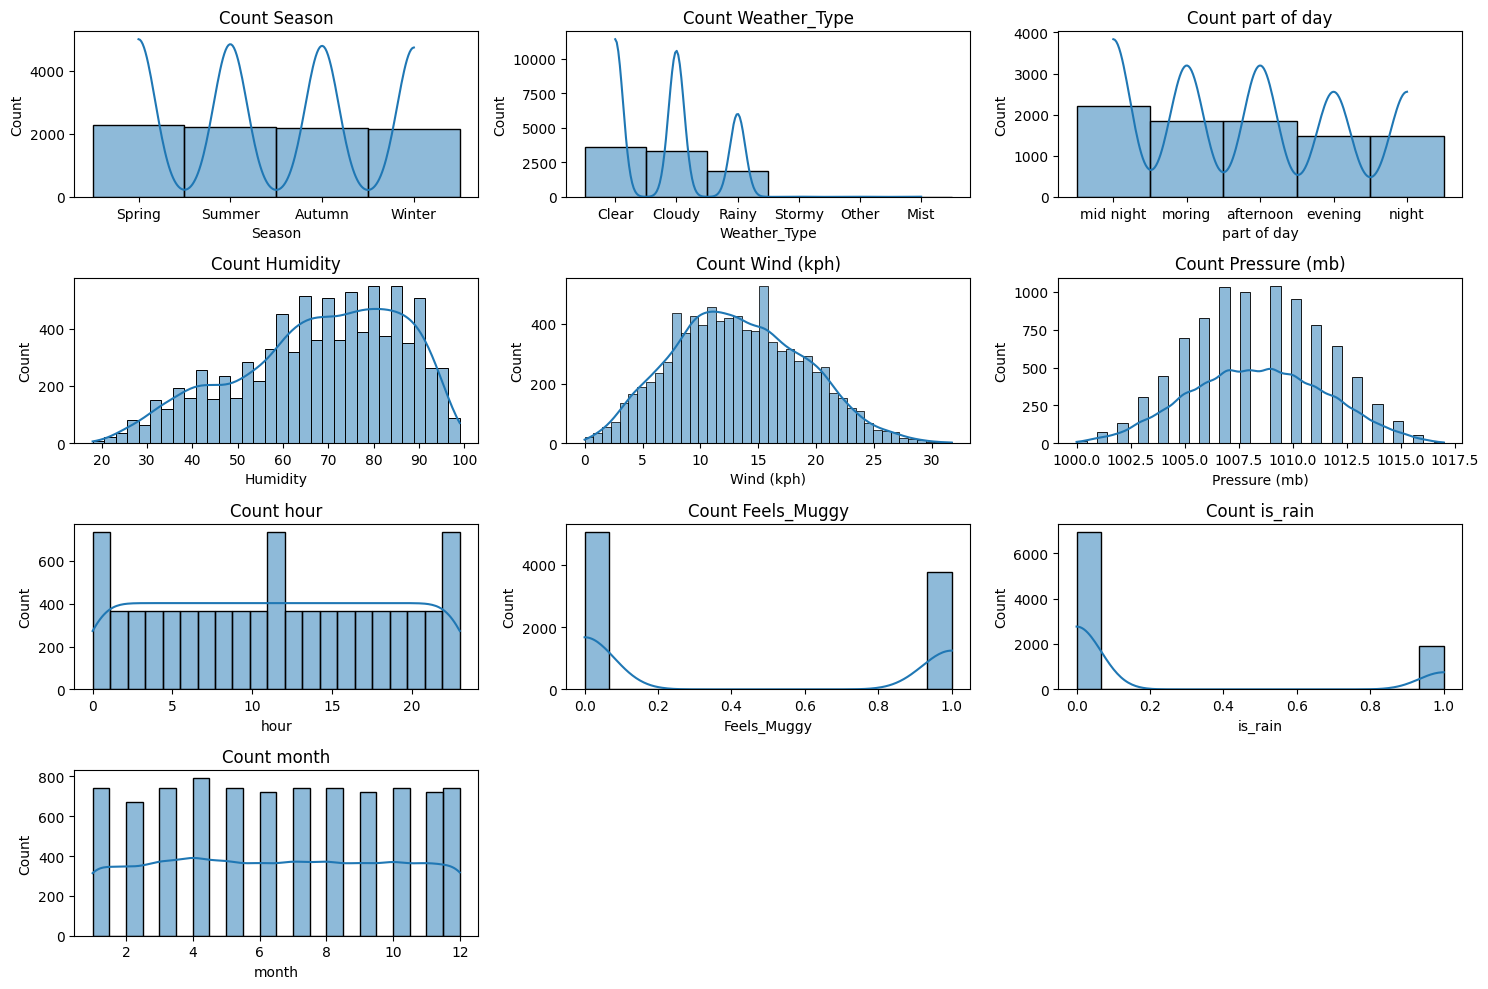

In [ ]:

plt.figure(figsize=(15,10))
temprature_levels = ['Season', 'Weather_Type','part of day','Humidity','Wind (kph)', 'Pressure (mb)', 'hour','Feels_Muggy', 'is_rain','month']
plot_num=1
for col in temprature_levels:
    plt.subplot(4,3,plot_num)
    sns.histplot(data=df,x=X[col],kde=True)
    plt.title(f'Count {col}')
    plot_num+=1
plt.tight_layout()
plt.show()

# **label encoder**

In [ ]:
#label encoder

from sklearn.preprocessing import LabelEncoder
season=LabelEncoder()
X['Season']=season.fit_transform(X['Season'])

In [ ]:
partofday=LabelEncoder()
X['part of day']=partofday.fit_transform(X['part of day'])

# **one heart encodeing**

In [ ]:
X=pd.get_dummies(X,columns=['Weather_Type']).astype(int)

In [ ]:
X

,Season,part of day,Humidity,Wind (kph),Pressure (mb),month,hour,Feels_Muggy,is_rain,Weather_Type_Clear,Weather_Type_Cloudy,Weather_Type_Mist,Weather_Type_Other,Weather_Type_Rainy,Weather_Type_Stormy
2024-04-10,1,2,83,8,1010,4,0,1,0,1,0,0,0,0,0
2024-04-10,1,2,84,7,1010,4,1,1,0,0,1,0,0,0,0
2024-04-10,1,2,85,7,1009,4,2,1,0,0,1,0,0,0,0
2024-04-10,1,2,86,7,1009,4,3,1,0,0,1,0,0,0,0
2024-04-10,1,2,87,7,1009,4,4,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-12,1,1,69,22,1006,4,19,1,0,1,0,0,0,0,0
2025-04-12,1,4,70,18,1008,4,20,1,0,0,0,0,0,0,1
2025-04-12,1,4,67,11,1009,4,21,1,1,0,0,0,0,1,0
2025-04-12,1,4,68,5,1010,4,22,1,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# **random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42,n_estimators=100)


In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
prediction=rfr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
print("accuracy : ",score)

accuracy :  0.9633147802084566


In [ ]:
#get important feature
importance=rfr.feature_importances_
columns=X.columns

In [ ]:
importance

array([9.51799246e-03, 4.88044123e-03, 8.07776292e-01, 1.55167599e-02,
       1.73972385e-02, 5.00035992e-02, 2.91235669e-02, 5.91199677e-02,
       1.26420070e-03, 2.88166410e-03, 1.14462384e-03, 1.25332497e-07,
       4.54842750e-06, 1.36427738e-03, 4.70227870e-06])

In [ ]:
df_feature=pd.DataFrame({'feature_column':columns,'important':importance,'percendage':importance})
df_feature['Percentage'] = df_feature['important'].map(lambda x: f"{x:.3f}")
# Sort by Importance in descending order
data_sorted = df_feature.sort_values(by='important', ascending=False)
data_sorted

,feature_column,important,percendage,Percentage
2,Humidity,8.077763e-01,8.077763e-01,0.808
7,Feels_Muggy,5.911997e-02,5.911997e-02,0.059
5,month,5.000360e-02,5.000360e-02,0.050
6,hour,2.912357e-02,2.912357e-02,0.029
4,Pressure (mb),1.739724e-02,1.739724e-02,0.017
3,Wind (kph),1.551676e-02,1.551676e-02,0.016
0,Season,9.517992e-03,9.517992e-03,0.010
1,part of day,4.880441e-03,4.880441e-03,0.005
9,Weather_Type_Clear,2.881664e-03,2.881664e-03,0.003
13,Weather_Type_Rainy,1.364277e-03,1.364277e-03,0.001


# **xg boost**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("Accuracy ",r2)

Accuracy  0.9628019322826412


In [ ]:
importance=xgb.feature_importances_
columns=X.columns

In [ ]:
df_feature=pd.DataFrame({'feature_column':columns,'important':importance,'percendage':importance})
df_feature['Percentage'] = df_feature['important'].map(lambda x: f"{x:.3f}")
# Sort by Importance in descending order
data_sorted = df_feature.sort_values(by='important', ascending=False)
data_sorted

,feature_column,important,percendage,Percentage
2,Humidity,0.496427,0.496427,0.496
7,Feels_Muggy,0.339204,0.339204,0.339
5,month,0.045416,0.045416,0.045
0,Season,0.034359,0.034359,0.034
6,hour,0.021223,0.021223,0.021
1,part of day,0.017286,0.017286,0.017
4,Pressure (mb),0.013226,0.013226,0.013
9,Weather_Type_Clear,0.011944,0.011944,0.012
8,is_rain,0.008827,0.008827,0.009
3,Wind (kph),0.006242,0.006242,0.006


In [ ]:
import numpy as np
let=x_test.iloc[0,:].values
print(xgb.predict([let]))
print(x_test.iloc[0,:])


[26.669535]
Season                    1
part of day               2
Humidity                 78
Wind (kph)                3
Pressure (mb)          1010
month                     4
hour                      4
Feels_Muggy               1
is_rain                   1
Weather_Type_Clear        0
Weather_Type_Cloudy       0
Weather_Type_Mist         0
Weather_Type_Other        0
Weather_Type_Rainy        1
Weather_Type_Stormy       0
Name: 2025-04-05, dtype: int64


# **Next day prediction**

In [ ]:
new_df=df.loc[:,['Humidity','Feels_Muggy','month','Season','hour','part of day','Pressure (mb)','Temperature (°C)']]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8832 entries, 2024-04-10 to 2025-04-12
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Humidity          8832 non-null   int64   
 1   Feels_Muggy       8832 non-null   int64   
 2   month             8832 non-null   int32   
 3   Season            8832 non-null   object  
 4   hour              8832 non-null   int32   
 5   part of day       8832 non-null   category
 6   Pressure (mb)     8832 non-null   float64 
 7   Temperature (°C)  8832 non-null   float64 
dtypes: category(1), float64(2), int32(2), int64(2), object(1)
memory usage: 749.9+ KB


In [ ]:
new_df.index=pd.to_datetime(new_df.index)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8832 entries, 2024-04-10 to 2025-04-12
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Humidity          8832 non-null   int64   
 1   Feels_Muggy       8832 non-null   int64   
 2   month             8832 non-null   int32   
 3   Season            8832 non-null   object  
 4   hour              8832 non-null   int32   
 5   part of day       8832 non-null   category
 6   Pressure (mb)     8832 non-null   float64 
 7   Temperature (°C)  8832 non-null   float64 
dtypes: category(1), float64(2), int32(2), int64(2), object(1)
memory usage: 491.8+ KB


In [ ]:
cutoff_date=new_df.index[-1]-pd.Timedelta(days=7)
cutoff_date

Timestamp('2025-04-05 00:00:00')

In [ ]:
train = new_df[new_df.index <= cutoff_date]
test = new_df[new_df.index > cutoff_date]

In [ ]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
y_test=test.iloc[:,-1]
x_test=test.iloc[:,:-1]

In [ ]:
x_train

,Humidity,Feels_Muggy,month,Season,hour,part of day,Pressure (mb)
2024-04-10,83,1,4,Spring,0,mid night,1010.0
2024-04-10,84,1,4,Spring,1,mid night,1010.0
2024-04-10,85,1,4,Spring,2,mid night,1009.0
2024-04-10,86,1,4,Spring,3,mid night,1009.0
2024-04-10,87,1,4,Spring,4,mid night,1009.0
...,...,...,...,...,...,...,...
2025-04-05,69,1,4,Spring,19,evening,1009.0
2025-04-05,69,1,4,Spring,20,night,1009.0
2025-04-05,70,1,4,Spring,21,night,1010.0
2025-04-05,71,1,4,Spring,22,night,1010.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
seson=LabelEncoder()
x_train['Season']=season.fit_transform(x_train['Season'])
partofday=LabelEncoder()
x_train['part of day']=partofday.fit_transform(x_train['part of day'])


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
x_test['Season']=season.transform(x_test['Season'])
x_test['part of day']=partofday.transform(x_test['part of day'])

In [ ]:
y_pred=xgb.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("Accuracy ",r2)

Accuracy  0.9418649621097506


# **part of day prediction**

In [ ]:
x_test

,Humidity,Feels_Muggy,month,Season,hour,part of day,Pressure (mb)
2025-04-06,73,1,4,1,0,2,1010.0
2025-04-06,74,1,4,1,1,2,1009.0
2025-04-06,75,1,4,1,2,2,1009.0
2025-04-06,75,1,4,1,3,2,1009.0
2025-04-06,76,1,4,1,4,2,1009.0
...,...,...,...,...,...,...,...
2025-04-12,69,1,4,1,19,1,1006.0
2025-04-12,70,1,4,1,20,4,1008.0
2025-04-12,67,1,4,1,21,4,1009.0
2025-04-12,68,1,4,1,22,4,1010.0


In [ ]:
# Morning: 5AM to 11AM
morning = x_test[(x_test['hour'] >= 5) & (x_test['hour'] < 12)]

# Afternoon: 12PM to 4PM
afternoon =x_test[(x_test['hour'] >= 12) & (x_test['hour'] < 17)]

# Evening: 5PM to 8PM
evening = x_test[(x_test['hour'] >= 17) & (x_test['hour'] < 21)]

# Night: 9PM to 4AM (split into two parts for proper logic)
night = x_test[(x_test['hour'] >= 21) | (x_test['hour'] < 5)]

In [ ]:
morning

,Humidity,Feels_Muggy,month,Season,hour,part of day,Pressure (mb)
2025-04-06,76,1,4,1,5,2,1009.0
2025-04-06,75,1,4,1,6,3,1009.0
2025-04-06,66,1,4,1,7,3,1010.0
2025-04-06,59,0,4,1,8,3,1010.0
2025-04-06,52,0,4,1,9,3,1010.0
2025-04-06,46,0,4,1,10,3,1010.0
2025-04-06,41,0,4,1,11,0,1009.0
2025-04-07,74,1,4,1,5,2,1008.0
2025-04-07,74,1,4,1,6,3,1009.0
2025-04-07,69,1,4,1,7,3,1010.0


In [ ]:
def predict_next_day(test):
  y_pred=xgb.predict(test)
  return y_pred[0]

In [ ]:
day ={
    'Morning':predict_next_day(morning),
    'AfterNoon':predict_next_day(afternoon),
    'Evening':predict_next_day(evening),
    "night":predict_next_day(night)
}

In [ ]:
day

{'Morning': np.float32(26.762877),
 'AfterNoon': np.float32(35.577988),
 'Evening': np.float32(31.938538),
 'night': np.float32(26.293789)}

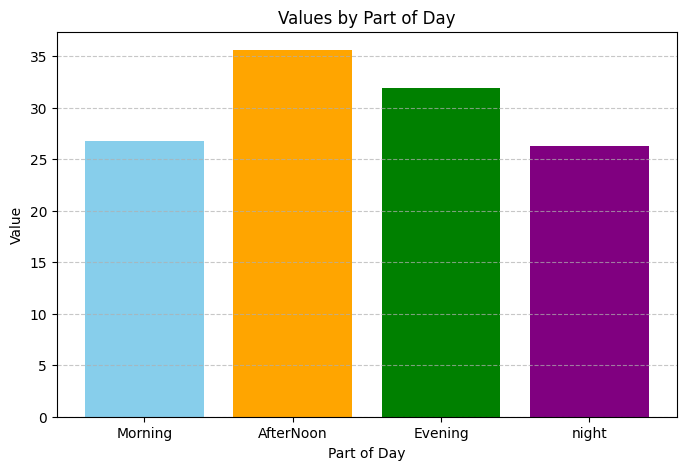

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(day.keys(), day.values(), color=['skyblue', 'orange', 'green', 'purple'])
plt.xlabel('Part of Day')
plt.ylabel('Value')
plt.title('Values by Part of Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()